In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd '/content/drive/MyDrive/car-classification-api/car-classification-api'

/content/drive/MyDrive/car-classification-api/car-classification-api


In [4]:
!git status

Refresh index: 100% (7/7), done.
On branch main
Your branch is up to date with 'origin/main'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	new file:   notebooks/colab/test2 - efficientnet.ipynb

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   notebooks/colab/test2 - efficientnet.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	models/
	notebooks/colab/test2 - efficientnet (1).ipynb



In [ ]:
# !pip install torch torchvision matplotlib timm

In [ ]:
from PIL import Image
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import torchvision
from torchvision import datasets, transforms, models
from torch.utils.data import random_split, DataLoader, Subset
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import pandas as pd
# import timm

In [ ]:
# Define augmentations to be carried out
train_transformers = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    # transforms.RandomErasing(p=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transformers = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
# Load the train dataset
train_data = datasets.ImageFolder("/content/drive/MyDrive/car-classification-api/data/train")

# Split the data further into train and val sets
train_size = int(0.8*len(train_data))
val_size = len(train_data) - train_size
train_indices, val_indices = random_split(range(len(train_data)), [train_size, val_size])
# train_dataset, val_dataset = random_split(train_data, [train_size, val_size])

In [ ]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, original_dataset, indices, transform=None):
        self.original_dataset = Subset(original_dataset, indices)
        self.transform = transform

    def __len__(self):
        return len(self.original_dataset)

    def __getitem__(self, idx):
        img, label = self.original_dataset[idx]
        if self.transform:
            img = self.transform(img)
        return img, label

In [ ]:
# Define train and validation datasets with separate transforms
train_dataset = CustomDataset(train_data, train_indices, transform=train_transformers)
val_dataset = CustomDataset(train_data, val_indices, transform=val_transformers)

In [ ]:
img, label = train_dataset[3]  # Replace 0 with any valid index
print(type(img))  # Should show <class 'torch.Tensor'>
print(img.shape)  # Should show [3, 224, 224] or similar

<class 'torch.Tensor'>
torch.Size([3, 224, 224])


In [ ]:
for i in range(15):  # Inspect the first 5 samples
  img, label = train_dataset[i]
  print(f"Sample {i}: Type - {type(img)}, Shape - {img.shape}")

Sample 0: Type - <class 'torch.Tensor'>, Shape - torch.Size([3, 224, 224])
Sample 1: Type - <class 'torch.Tensor'>, Shape - torch.Size([3, 224, 224])
Sample 2: Type - <class 'torch.Tensor'>, Shape - torch.Size([3, 224, 224])
Sample 3: Type - <class 'torch.Tensor'>, Shape - torch.Size([3, 224, 224])
Sample 4: Type - <class 'torch.Tensor'>, Shape - torch.Size([3, 224, 224])
Sample 5: Type - <class 'torch.Tensor'>, Shape - torch.Size([3, 224, 224])
Sample 6: Type - <class 'torch.Tensor'>, Shape - torch.Size([3, 224, 224])
Sample 7: Type - <class 'torch.Tensor'>, Shape - torch.Size([3, 224, 224])
Sample 8: Type - <class 'torch.Tensor'>, Shape - torch.Size([3, 224, 224])
Sample 9: Type - <class 'torch.Tensor'>, Shape - torch.Size([3, 224, 224])
Sample 10: Type - <class 'torch.Tensor'>, Shape - torch.Size([3, 224, 224])
Sample 11: Type - <class 'torch.Tensor'>, Shape - torch.Size([3, 224, 224])
Sample 12: Type - <class 'torch.Tensor'>, Shape - torch.Size([3, 224, 224])
Sample 13: Type - <cla

In [ ]:
# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [ ]:
# for inputs, labels in train_loader:
#     print(type(inputs), inputs.shape)  # Should work without error
#     break

<class 'torch.Tensor'> torch.Size([32, 3, 224, 224])


In [ ]:
# inputs, labels = next(iter(train_loader))
# print(inputs.shape, labels.shape)

torch.Size([32, 3, 224, 224]) torch.Size([32])


In [ ]:
# Load pre-trained model, EfficientNet-B0
model = models.efficientnet_b0(pretrained=True)

# Modify final classification layer
num_ftrs = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_ftrs, len(train_data.classes))

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 120MB/s] 


In [ ]:
print(model)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [ ]:
# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [ ]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 10

train_losses, val_losses = [], []
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()
        # Forward
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        # Backward
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_losses.append(running_loss / len(train_loader))

    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")

Epoch 1/10, Loss: 4.3178
Epoch 2/10, Loss: 2.0983
Epoch 3/10, Loss: 1.1520
Epoch 4/10, Loss: 0.7382
Epoch 5/10, Loss: 0.4984
Epoch 6/10, Loss: 0.4429
Epoch 7/10, Loss: 0.3300
Epoch 8/10, Loss: 0.2844
Epoch 9/10, Loss: 0.2152
Epoch 10/10, Loss: 0.2036


In [ ]:
# Create a directory
save_dir = '/content/drive/MyDrive/car-classification-api/car-classification-api/models'
# os.makedirs(save_dir, exist_ok=True)


In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/car-classification-api/car-classification-api/models/efficientnet_b0_state_dict.pth')
torch.save(model, '/content/drive/MyDrive/car-classification-api/car-classification-api/models/efficientnet_b0_entire_model.pth')

In [ ]:
y_true, y_pred = [], []

model.eval()
correct = 0
total = 0
val_loss = 0.0
processed_images = 0

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())
        loss = criterion(outputs, labels)
        val_loss += loss.item()

        processed_images += labels.size(0)
        if processed_images % 500 == 0 or processed_images == total:
            print(f"Processed {processed_images} / {len(val_loader.dataset)} images...")

val_losses.append(val_loss / len(val_loader))
print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Convert to DataFrame for better readability
cm_df = pd.DataFrame(cm, index=train_data.classes, columns=train_data.classes)
print(cm_df)

print(f"Validation Accuracy: {100 * correct / total:.2f}%")

Processed 32 / 1629 images...
Processed 64 / 1629 images...
Processed 96 / 1629 images...
Processed 128 / 1629 images...
Processed 160 / 1629 images...
Processed 192 / 1629 images...
Processed 224 / 1629 images...
Processed 256 / 1629 images...
Processed 288 / 1629 images...
Processed 320 / 1629 images...
Processed 352 / 1629 images...
Processed 384 / 1629 images...
Processed 416 / 1629 images...
Processed 448 / 1629 images...
Processed 480 / 1629 images...
Processed 512 / 1629 images...
Processed 544 / 1629 images...
Processed 576 / 1629 images...
Processed 608 / 1629 images...
Processed 640 / 1629 images...
Processed 672 / 1629 images...
Processed 704 / 1629 images...
Processed 736 / 1629 images...
Processed 768 / 1629 images...
Processed 800 / 1629 images...
Processed 832 / 1629 images...
Processed 864 / 1629 images...
Processed 896 / 1629 images...
Processed 928 / 1629 images...
Processed 960 / 1629 images...
Processed 992 / 1629 images...
Processed 1024 / 1629 images...
Processed 

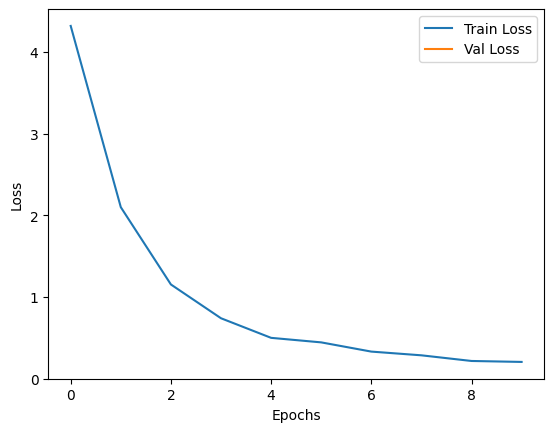

In [ ]:
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()